In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew

In [108]:
unfilt_hcc_smarts = pd.read_csv("data/smartSeq/MCF7_SmartS_Unfiltered_Data.txt", sep = " ")
meta_hcc_smarts = pd.read_table("data/smartSeq/MCF7_SmartS_MetaData.tsv")

unfilt_mcf_smarts = pd.read_csv("data/smartSeq/MCF7_SmartS_Unfiltered_Data.txt", sep = " ")
meta_mcf_smarts = pd.read_table("data/smartSeq/MCF7_SmartS_MetaData.tsv")

## Data Exploration and Visualisation

As aforementioned, the metadata file contains general information about each cell, as can be seen in the code below. With the *Condition* column being our target for the overall project.

In [109]:
meta_hcc_smarts

,Filename,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
0,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
1,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
2,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
3,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
4,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
...,...,...,...,...,...,...,...,...,...
378,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...,MCF7,output.STAR.4,H5,Norm,72,S359,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
379,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...,MCF7,output.STAR.4,H6,Norm,72,S360,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
380,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...,MCF7,output.STAR.4,H7,Hypo,72,S379,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
381,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...,MCF7,output.STAR.4,H8,Hypo,72,S380,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


Moreover, as already discussed in the introduciton, we then have the unfiltered dataset which contains the different cells as its columns and the count of each gene (row) respectively.

In [110]:
print(f"The dimension of the unfiltered hcc1806 dataset is: {unfilt_hcc_smarts.shape}")
print(f"The dimension of the unfiltered mcf7 dataset is: {unfilt_mcf_smarts.shape}")
unfilt_mcf_smarts

The dimension of the unfiltered hcc1806 dataset is: (22934, 383)
The dimension of the unfiltered mcf7 dataset is: (22934, 383)


,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
WASH7P,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
MIR6859-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WASH9P,1,0,0,0,0,1,10,1,0,0,...,1,1,0,0,0,0,1,1,4,5
OR4F29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MTND1P23,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-TE,4,0,0,0,3,3,0,0,14,1,...,0,4,12,4,0,1,6,0,7,4
MT-CYB,270,1,76,66,727,2717,9326,3253,7949,30,...,239,3795,12761,2263,1368,570,3477,349,2184,1149
MT-TT,0,0,0,0,0,1,1,1,4,0,...,0,7,4,2,0,0,3,0,2,2
MT-TP,5,0,0,1,0,1,1,4,2,0,...,0,14,56,11,2,0,7,2,28,11


It is important to check whether all the values in the datasets are of the same type, as if they aren't they'd require adaptation.

In [111]:
print(f"The datatypes in the hcc1806 dataset are: {str(set([i for i in unfilt_hcc_smarts.T.dtypes]))[8:-3]}")
print(f"The datatypes in the mcf7 dataset are: {str(set([i for i in unfilt_mcf_smarts.T.dtypes]))[8:-3]}")
print("Hence, they are all of the same type.")

The datatypes in the hcc1806 dataset are: int64
The datatypes in the mcf7 dataset are: int64
Hence, they are all of the same type.


Let's also run a .describe() of the datasets to get a more general picture.

In [112]:
print(unfilt_mcf_smarts.describe())
print(unfilt_hcc_smarts.describe())

       output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam  \
count                                       22934.000000          
mean                                           40.817651          
std                                           465.709940          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                            17.000000          
max                                         46744.000000          

       output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam  \
count                                       22934.000000          
mean                                            0.012253          
std                                             0.207726          
min                                             0.000000          
25%                                             0.000000     

It's interesting as it seems that some columns have an average gene count of 0... we will explore this later and address it.

We now check for null values, which would have to be dealt with in the circumstance that they were present.

In [113]:
print(f"The number of null values in the hcc1806 dataset are: {unfilt_hcc_smarts.isnull().sum(axis = 1).sum(axis = 0)}")
print(f"The number of null values in the mcf7 dataset are: {unfilt_mcf_smarts.isnull().sum(axis = 1).sum(axis = 0)}")

The number of null values in the hcc1806 dataset are: 0
The number of null values in the mcf7 dataset are: 0


Before continuing onto the more serious part of data visualisation and exploration, let's check for and remove duplicate rows in each dataframe... this could be the result of various reasons such as but not limited to redundancy in gene annotation, overlapping of gene annotation on the same region etc.

In [114]:
hcc_dup_unfilt = unfilt_hcc_smarts[unfilt_hcc_smarts.duplicated(keep=False)]
print(f"The number of duplicate rows in the HCC1806 dataframe is: {hcc_dup_unfilt.shape[0]}")
mcf_dup_unfilt = unfilt_mcf_smarts[unfilt_mcf_smarts.duplicated(keep=False)]
print(f"The number of duplicate rows in the HCC1806 dataframe is: {mcf_dup_unfilt.shape[0]}")

The number of duplicate rows in the HCC1806 dataframe is: 56
The number of duplicate rows in the HCC1806 dataframe is: 56


It is important to keep track of the genes which we will remove during this step, as duplicates, and we may do so consulting the correlation matrix and connecting genes with perfect correlation with each other in a dictionary.

In [115]:
hcc_dup_unfilt_corr = hcc_dup_unfilt.T.corr()
mcf_dup_unfilt_corr = mcf_dup_unfilt.T.corr()

hcc_duplicates_dict = dict()
for col in hcc_dup_unfilt_corr.columns:
    for row in hcc_dup_unfilt_corr.index:
        if (hcc_dup_unfilt_corr.loc[row, col] == 1 and row != col):
            if row not in hcc_duplicates_dict:
               hcc_duplicates_dict[row] = []
            hcc_duplicates_dict[row].append(col)
               

mcf_duplicates_dict = dict()
for col in mcf_dup_unfilt_corr.columns:
    for row in mcf_dup_unfilt_corr.index:
        if (mcf_dup_unfilt_corr.loc[row, col] == 1 and row != col):
            if row not in mcf_duplicates_dict:
               mcf_duplicates_dict[row] = []
            mcf_duplicates_dict[row].append(col)

print("This dictionary stores the genes of correlation 1 together")          
hcc_duplicates_dict

This dictionary stores the genes of correlation 1 together


{'COQ10BP2': ['SHISAL2A'],
 'GALNT17': ['IL12RB2', 'PON1'],
 'PON1': ['IL12RB2', 'GALNT17'],
 'MUC6': ['S1PR1'],
 'WDR95P': ['CD84'],
 'KCNS2': ['GNLY', 'BCL6B'],
 'BCL6B': ['GNLY', 'KCNS2'],
 'KLF2P3': ['FAR2P3'],
 'FAR2P3': ['KLF2P3'],
 'SLC22A14': ['PABPC1P2'],
 'UGT1A9': ['UGT1A8'],
 'UGT1A8': ['UGT1A9'],
 'PABPC1P2': ['SLC22A14'],
 'SHISAL2A': ['COQ10BP2'],
 'LAP3P2': ['PANDAR'],
 'PANDAR': ['LAP3P2'],
 'RNA5SP450': ['RPL22P16'],
 'IL12RB2': ['GALNT17', 'PON1'],
 'RNU6-539P': ['HTR5A'],
 'MIR664B': ['SNORA36A'],
 'SNORA36A': ['MIR664B'],
 'SEZ6L': ['CSMD1'],
 'GNLY': ['KCNS2', 'BCL6B'],
 'MIR548D1': ['MIR548AA1'],
 'MIR548AA1': ['MIR548D1'],
 'CACYBPP1': ['MTCO2P11'],
 'OTOP3': ['CLCN3P1'],
 'STRA6LP': ['SUGT1P4-STRA6LP'],
 'SUGT1P4-STRA6LP': ['STRA6LP'],
 'S1PR1': ['MUC6'],
 'PSG1': ['VSTM4'],
 'LINC00595': ['LINC00856'],
 'LINC00856': ['LINC00595'],
 'MTCO2P11': ['CACYBPP1'],
 'KNOP1P1': ['LINC00477'],
 'LINC00477': ['KNOP1P1'],
 'CD84': ['WDR95P'],
 'MIR19B1': ['MIR20A'],
 'MIR

In [116]:
unfilt_hcc_smarts = unfilt_hcc_smarts.copy().drop_duplicates()
unfilt_mcf_smarts = unfilt_mcf_smarts.copy().drop_duplicates()

Now let's look at the correlation between cells. It may be useful in cutting down the overall size of the dataframe and moreover better understand its structure.

<AxesSubplot:title={'center':'MCF7 cell correlation heatmap'}>

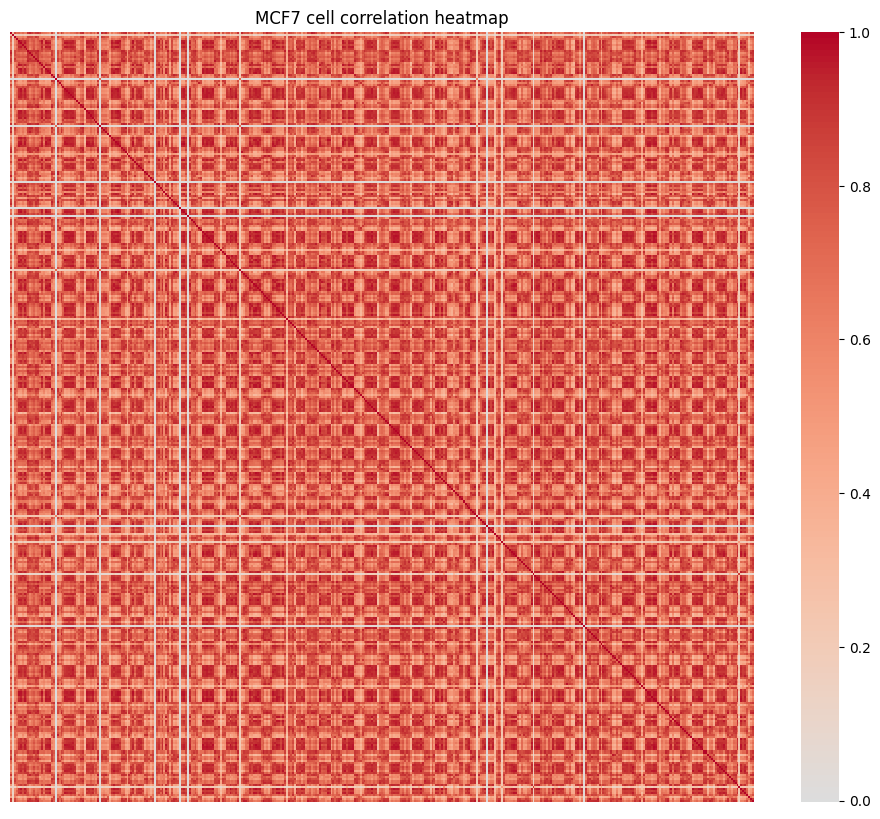

In [117]:
plt.figure(figsize=(12,10))
plt.title("MCF7 cell correlation heatmap")
corr = unfilt_mcf_smarts.corr()
midpoint = (corr.values.max() - corr.values.min()) /2 + corr.values.min()

sns.heatmap(corr,cmap="coolwarm", center=0, yticklabels=False , xticklabels=False)

<AxesSubplot:title={'center':'HCC1806 cell correlation heatmap'}>

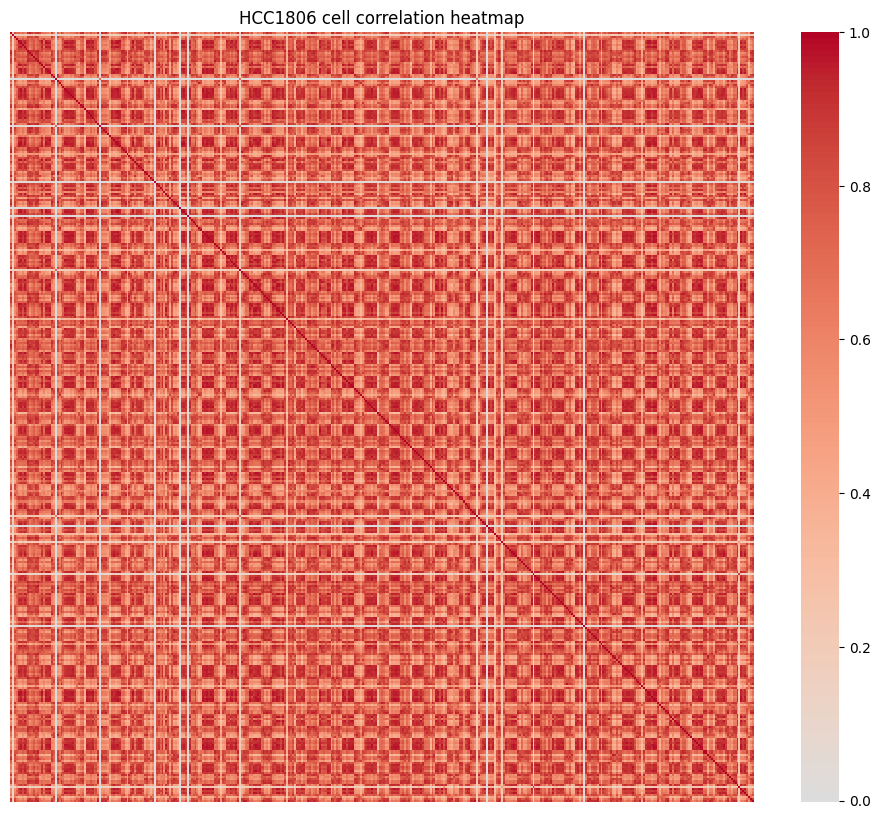

In [118]:
plt.figure(figsize=(12,10))
plt.title("HCC1806 cell correlation heatmap")
corr = unfilt_hcc_smarts.corr()
midpoint = (corr.values.max() - corr.values.min()) /2 + corr.values.min()

sns.heatmap(corr,cmap="coolwarm", center=0, yticklabels=False , xticklabels=False)

Interestingly there are cells which have a correlation close to 0 with respect to all other cells, we will analyse them to try to understand why.

In [119]:
corr = unfilt_mcf_smarts.corr()
corr_matrix = pd.DataFrame(data=corr)
corr_matrix.head()

,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,1.000000,0.292563,0.808327,0.697867,0.721238,0.642944,0.709256,0.617516,0.618797,0.900562,...,0.838972,0.521678,0.163049,0.560567,0.554856,0.570937,0.668704,0.457652,0.890290,0.874444
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0.292563,1.000000,0.146211,0.182908,0.212986,0.171820,0.222131,0.148956,0.171640,0.220782,...,0.196887,0.136896,0.116030,0.145562,0.135929,0.110860,0.141648,0.137014,0.254228,0.199628
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0.808327,0.146211,1.000000,0.646248,0.600343,0.588113,0.635101,0.576842,0.604274,0.844292,...,0.802607,0.540558,0.132706,0.547424,0.576646,0.607399,0.693277,0.609514,0.843926,0.851432
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,0.697867,0.182908,0.646248,1.000000,0.715387,0.692155,0.780417,0.692131,0.760657,0.775324,...,0.736467,0.706522,0.346197,0.662220,0.759786,0.689689,0.783970,0.451546,0.667987,0.719325
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0.721238,0.212986,0.600343,0.715387,1.000000,0.955125,0.895658,0.943619,0.869162,0.838084,...,0.679762,0.823226,0.172089,0.902143,0.865802,0.883351,0.698420,0.328019,0.566163,0.667332


Text(0, 0.5, 'Frequency')

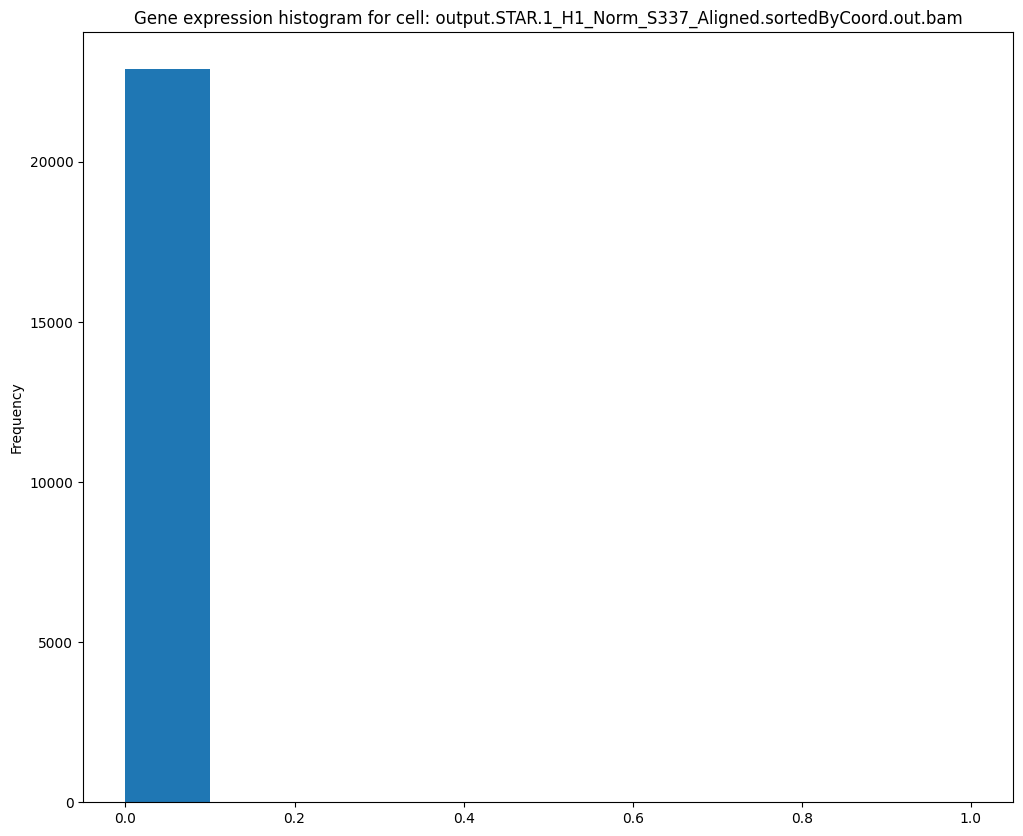

In [120]:
#let's find the cell with the lowest correlation with respect to all other cells and plot its gene structure.
col_sums = corr_matrix.sum()
min_col = col_sums.idxmin()
plt.figure(figsize=(12,10))
plt.hist(unfilt_mcf_smarts.loc[:,min_col])
plt.title(f"Gene expression histogram for cell: {min_col}")
plt.ylabel("Frequency")

As is evident in the histogram, the reason for why some cells are totally uncorrelated to others is that they have a gene count of 0 for all genes (or at least very close to 0 in the other cases). These cells will be removed during the filtering part.

In this project we will be more so focus on genes as opposed to cells, and therefore understanding the correlations between genes could aid us in the construction of a model with better accuracy (as well as reducing redundancy by not including all the covariates which are highly correlated between each other).

Average correlation between cells:  0.3695789318416762
Minimum correlation between cells:  -0.2608421363166476 



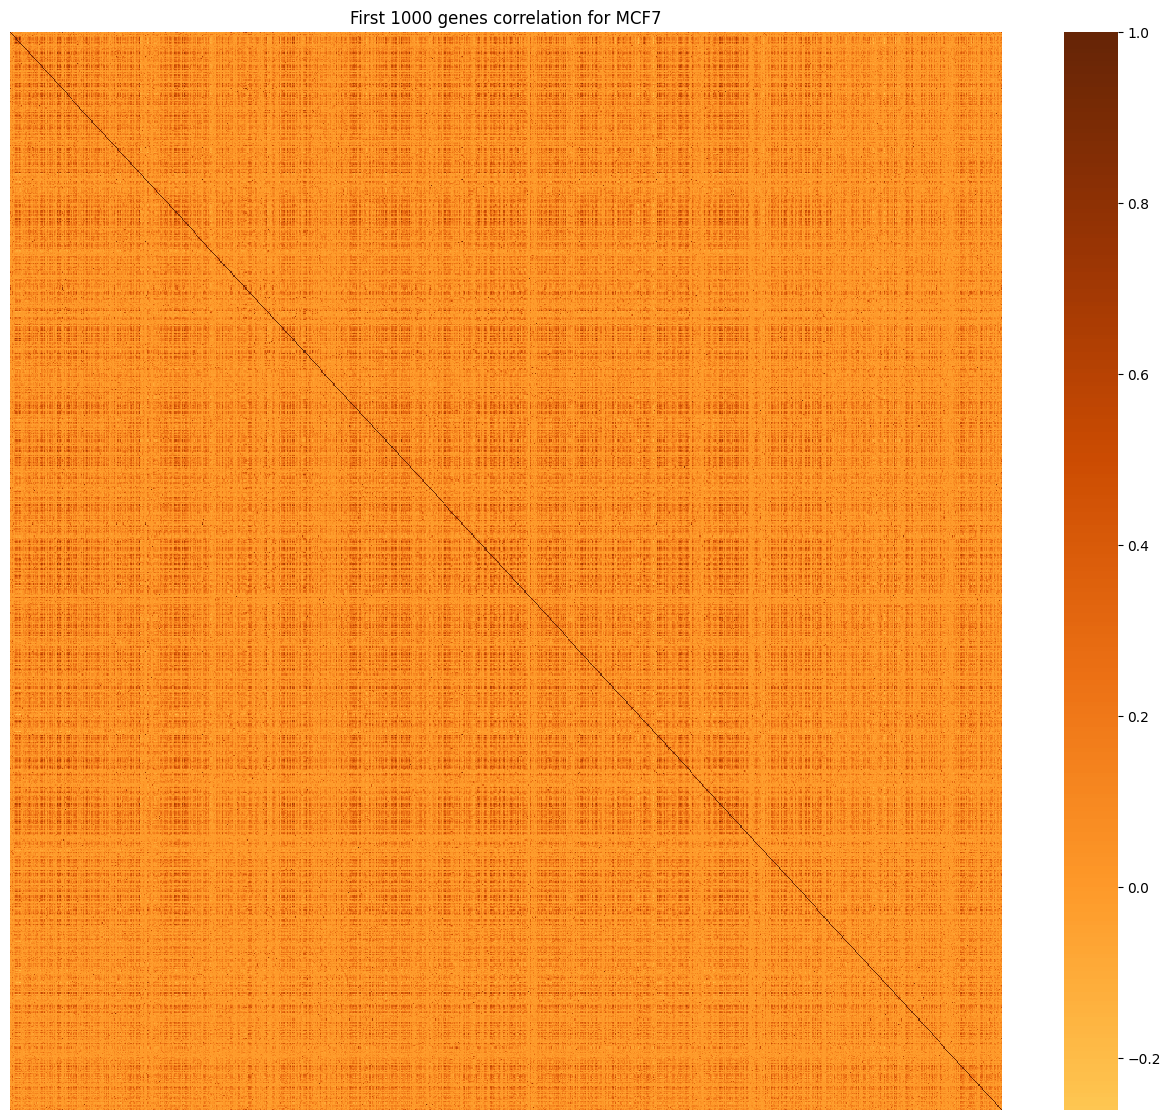

In [121]:
plt.figure(figsize=(16,14))
plt.title("First 1000 genes correlation for MCF7")
#df_small = df.iloc[:, :50]
#c= df_small.corr()
corr = unfilt_mcf_smarts.iloc[:1000,:].T.corr()
midpoint = (corr.values.max() - corr.values.min()) /2 + corr.values.min()
#sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )
sns.heatmap(corr,cmap="YlOrBr", center=0, yticklabels=False , xticklabels=False)

print("Average correlation between cells: ", midpoint)
print("Minimum correlation between cells: ", corr.values.min(), "\n")

Sadly it seems as though no gene stands out with respect to its correlation with other genes. This could have been useful as the presence of highly important genes would have allowed substantial dimensionality reduction.

Let's now study the distribution of the data to better understand how to treat it when building our model at the end of the project.

Text(0.5, 0, 'Skewness of single cells expression profiles in the mcf7 df')

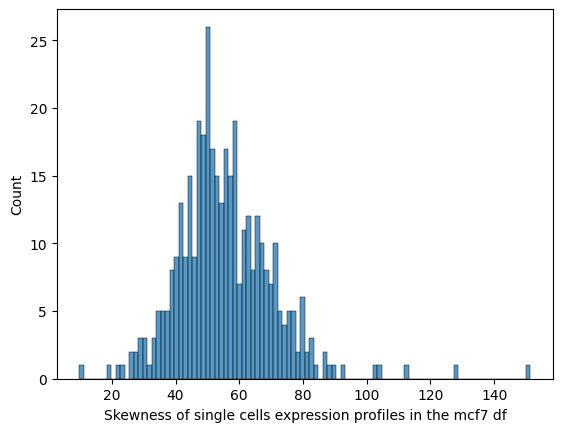

In [122]:
colN = np.shape(unfilt_mcf_smarts)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = unfilt_mcf_smarts[unfilt_mcf_smarts.columns[i]]
     df_skew_cells += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells
sns.histplot(df_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles in the mcf7 df')

Text(0.5, 0, 'Skewness of single cells expression profiles in the hcc1806 df')

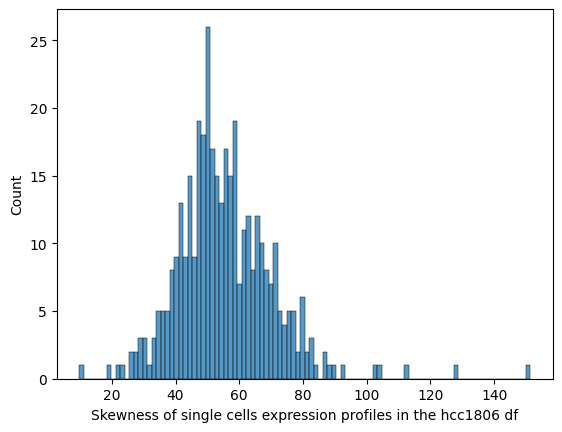

In [123]:
colN = np.shape(unfilt_hcc_smarts)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = unfilt_hcc_smarts[unfilt_hcc_smarts.columns[i]]
     df_skew_cells += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells
sns.histplot(df_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles in the hcc1806 df')

Text(0.5, 0, 'Kurtosis of single cells expression profiles in the mcf7 df')

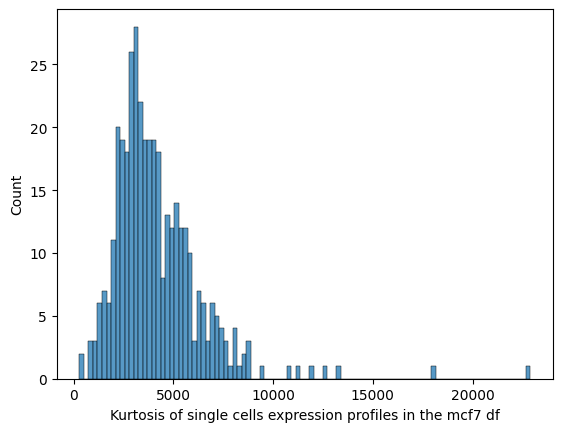

In [124]:
colN = np.shape(unfilt_mcf_smarts)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = unfilt_mcf_smarts[unfilt_mcf_smarts.columns[i]]
     df_skew_cells += [kurtosis(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells
sns.histplot(df_skew_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles in the mcf7 df')

Text(0.5, 0, 'Kurtosis of single cells expression profiles in the hcc1806 df')

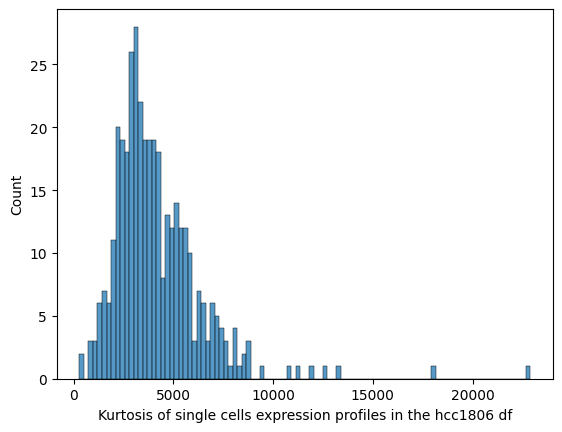

In [125]:
colN = np.shape(unfilt_hcc_smarts)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = unfilt_hcc_smarts[unfilt_hcc_smarts.columns[i]]
     df_skew_cells += [kurtosis(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells
sns.histplot(df_skew_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles in the hcc1806 df')

In [126]:
hcc_skew = [skew(unfilt_hcc_smarts[i]) for i in unfilt_hcc_smarts.columns]
mcf_skew = [skew(unfilt_mcf_smarts[i]) for i in unfilt_mcf_smarts.columns]
hcc_kurtosis = [kurtosis(unfilt_hcc_smarts[i]) for i in unfilt_hcc_smarts.columns]
mcf_kurtosis = [kurtosis(unfilt_mcf_smarts[i]) for i in unfilt_mcf_smarts.columns]
print(f"The mean skewness in the HCC1806 cells is: {np.mean(hcc_skew)}")
print(f"The mean kurtosis in the HCC1806 cells is: {np.mean(hcc_kurtosis)}")
print(f"The mean skewness in the MCF7 cells is: {np.mean(mcf_skew)}")
print(f"The mean kurtosis in the MCF7 cells is: {np.mean(mcf_kurtosis)}")

The mean skewness in the HCC1806 cells is: 55.56539160251531
The mean kurtosis in the HCC1806 cells is: 4159.683961614613
The mean skewness in the MCF7 cells is: 55.56539160251531
The mean kurtosis in the MCF7 cells is: 4159.683961614613


The above values of skewness and kurtosis for each dataframe highlight how the data is highly non-normal. When coupled with the fact that most cells have a count of 0 for most genes (but when they don't they can reach huge counts of 40000+) this suggests that the information is CONTAINED IN THE OUTLIERS. Therefore, the previous objective of removing them will be disregarded as it would make the data obsolete.